
##### MACHINE LEARNING AND ARTIFICIAL INTELLIGENCE IN FINANCE

### Estimating the probability of Distress 

**Aim**
The object of this task is to develop three models to predict the probability of distress of UK firms and classify firms into two groups of distress (1) vs healthy(0). 


In the given dataset (UKDATA_1990_2014), the id and features of 6607 UK firm-year observations for the period of 2010 to 2014, the deendent variable is the stress variable which is dichotomous variable (1 for distress and 0 for healthy), the other independent variables are numerical (float). The features are a list of profitability ratios, liquidity ratios, cash flow ratios, capital structure and solvency ratios, asset utilization ratio, firm characteristics, and market information. 

This qualifies the problem as a supervised - classification problem. Supervised classification problems available in data science include: Logistic Regression, Decision Tree, Random Forest, Support Vector Matrix (SVM), Neural Networks and many more. In this study, three of the mentioned will be used due to their popularity and rigour as reported in several studies.

The models to be developed are:

1. Decision Tree
2. Logistic Regression
3. Random Forest

**The structure** of this work follows this pattern:
1.0. Preliminaries
    1.1. Load Relevant Libraries
    1.2. Import Data
    1.3. Clean Data
2.0.  Exploratory Data Analysis
    2.1. Feature Selection
    2.2. Descriptive Analysis
    2.3. Visualizations
   
 3.0.  Model Building - Decision Tree
    3.1. Check model accuracy
    3.2. Check for over-fitting or under-fitting
4.0.  Model Building - Logistic Regression
    4.1. Check model accuracy
    4.2. Check for over-fitting or under-fitting
5.0.  Model Building - Random Forest
    5.1. Check model accuracy
    5.2. Check for over-fitting or under-fitting
6.0.  The accuracy of measures T1, T2, total   accuracy & AUC (Area Under Curve)
7.0.  Conclusion


In [8]:
# load libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats as st

# lbrary to split data into train and test
from sklearn.model_selection import train_test_split # Import train_test_split function

# libraries for decision tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#libraries for logistic regression
import sklearn.linear_model as glm
from sklearn.linear_model import  LogisticRegression


In [9]:
# import the data
df = pd.read_excel('UKData_1990_2014_Customised.xlsx')
df.head(3)

,Unnamed: 0,Unnamed: 1,Distressed = 1 | Healthy = 0,Profitability Ratio,Unnamed: 4,Unnamed: 5,Liquidity,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Capital Structure and Solvency Ratio,Unnamed: 14,Unnamed: 15,Asset Utilization Ratio,Firm Characteristics,Unnamed: 18,Market Information,Unnamed: 20,Unnamed: 21
0,Firm_id,year,y,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,...,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn,LagSigma
1,8812,2010,0,-0.014108,-0.266084,1,6.054536,0.234749,5.920886,2.341982,...,-0.083298,0.096442,0.135272,-54.663727,0.053022,12.725143,2.197225,2.027041,0.253332,388.76001
2,9253,2010,0,-0.008044,-0.016085,0,2.556376,1.141598,1.668415,1.678079,...,0.129681,0.261038,0.390958,0.180486,0.500068,13.185175,1.609438,4.458666,0.712462,109


In [10]:
#clean 1, make the row 0th as the column header
df.columns = df.iloc[0]

df.head(3)

,Firm_id,year,y,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,...,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn,LagSigma
0,Firm_id,year,y,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,...,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn,LagSigma
1,8812,2010,0,-0.014108,-0.266084,1,6.054536,0.234749,5.920886,2.341982,...,-0.083298,0.096442,0.135272,-54.663727,0.053022,12.725143,2.197225,2.027041,0.253332,388.76001
2,9253,2010,0,-0.008044,-0.016085,0,2.556376,1.141598,1.668415,1.678079,...,0.129681,0.261038,0.390958,0.180486,0.500068,13.185175,1.609438,4.458666,0.712462,109


In [11]:
#clean 2, now remove the 0th row

df.drop([0], axis=0, inplace=True)

df.head(2)


,Firm_id,year,y,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,...,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn,LagSigma
1,8812,2010,0,-0.014108,-0.266084,1,6.054536,0.234749,5.920886,2.341982,...,-0.083298,0.096442,0.135272,-54.663727,0.053022,12.725143,2.197225,2.027041,0.253332,388.76001
2,9253,2010,0,-0.008044,-0.016085,0,2.556376,1.141598,1.668415,1.678079,...,0.129681,0.261038,0.390958,0.180486,0.500068,13.185175,1.609438,4.458666,0.712462,109


In [12]:
df.shape #data contains 6605 rows, 22 columns

df.size

145310

In [13]:
#clean3 sort data by years column
df.sort_values('year')
df['year']

1       2010
2       2010
3       2010
4       2010
5       2010
        ... 
6601    2014
6602    2014
6603    2014
6604    2014
6605    2014
Name: year, Length: 6605, dtype: object

In [14]:
#create the features (independent variable) column by droping the first three columns/ select from the 4th column to the last
dfX = df.iloc[:, 3: -1]
dfX.head(3)

,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,CashandEquivalent_to_Assets,OperatingCashFlow_to_Assets,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn
1,-0.014108,-0.266084,1,6.054536,0.234749,5.920886,2.341982,0.200488,-0.004417,-0.083298,0.096442,0.135272,-54.663727,0.053022,12.725143,2.197225,2.027041,0.253332
2,-0.008044,-0.016085,0,2.556376,1.141598,1.668415,1.678079,0.140064,0.064849,0.129681,0.261038,0.390958,0.180486,0.500068,13.185175,1.609438,4.458666,0.712462
3,0.020855,0.104525,0,0.211685,2.360113,0.211685,0.227821,0.048582,0.052337,0.262315,0.371075,0.01489,2.386243,0.199521,7.822845,2.70805,1.601936,0.676842


In [15]:
#create only for the dependent variable
dfY = df['y ']
dfY=dfY.astype('int')
dfY.head(3)

1    0
2    0
3    0
Name: y , dtype: int32

#### Feature Selection
When there are too many variables (features) like we have in this data, the model might run into overfitting or underfitting problems. The computing time, needed resource and model complexity increases, and the output becomes really hard to explain. Too many features might also result into multicolinearity problem. Selecting relevant features therefore for speedy computation and less complex model. There exist different methods of feature selection, only the two most popular 'filter method' will be made use of:
1. Variance Threshold Selection
2. Recursive feature Elimination

In [16]:
#run this first time only to install skfeature which will help in fisher score

from sklearn.feature_selection import VarianceThreshold


### Variance Threshold Method of Feature Selection

In [17]:
dfX.var(axis=0) #there are 18 columns in the dataframe, 
#their variances ranged between 4.588208e-02 (CashandEquivalent_to_Assets) to
#6.652241e+06 (InterestCoverageRatio)

0
ReturnOnAssets                         2.155446e+00
NetIncome_to_Sales                     3.579785e+04
NegativeNetIncomeForLastTwoYears       2.269055e-01
CurrentAssets_to_CurrentLiabilities    3.367453e+02
CurrentAssetsTurnonver                 5.637367e+00
QuickRatio                             3.358546e+02
CurrentAssets_to_TotalLiabilities      3.700693e+06
CashandEquivalent_to_Assets            4.588208e-02
OperatingCashFlow_to_Assets            1.688321e-01
FreeCashFlowfromOperations_to_Sales    1.312254e+04
TotalDebtRatio                         1.959481e-01
LongTermDebt_to_Equity                 3.699223e+03
InterestCoverageRatio                  6.652241e+06
AssetTurnoverRatio                     1.704244e+00
LOG_Sales                              8.546314e+00
Log_Age                                5.151919e-01
RealSize                               9.560189e+01
LagExcessReturn                        1.873102e-01
dtype: float64

In [18]:
#selecting a threshold, for 85%, thst is to exclude variables that do not varry for at least 85% of the time

th = 0.85*(1-0.85)
th

0.1275

In [19]:
#remove variances less than 1.0
selectFt = VarianceThreshold(threshold=th) #selectFt for Select Feature
selectFt.fit(dfX)

VarianceThreshold(threshold=0.1275)

In [20]:
#Print the column names of selected features, 12 in total
selectFt.get_support()
np.array(dfX.columns)[selectFt.get_support()]

#assign the features to adeX1

dfX1 = dfX[['ReturnOnAssets', 'NetIncome_to_Sales',
       'NegativeNetIncomeForLastTwoYears',
       'CurrentAssets_to_CurrentLiabilities', 'CurrentAssetsTurnonver',
       'QuickRatio', 'CurrentAssets_to_TotalLiabilities',
       'OperatingCashFlow_to_Assets',
       'FreeCashFlowfromOperations_to_Sales', 'TotalDebtRatio',
       'LongTermDebt_to_Equity', 'InterestCoverageRatio',
       'AssetTurnoverRatio', 'LOG_Sales', 'Log_Age', 'RealSize',
       'LagExcessReturn']]

In [21]:
#checking the variances of the selected features
selectFt.variances_

array([2.15511989e+00, 3.57924283e+04, 2.26871139e-01, 3.36694338e+02,
       5.63651366e+00, 3.35803739e+02, 3.70013260e+06, 4.58751317e-02,
       1.68806511e-01, 1.31205521e+04, 1.95918386e-01, 3.69866302e+03,
       6.65123416e+06, 1.70398567e+00, 8.54502001e+00, 5.15113913e-01,
       9.55874152e+01, 1.87281889e-01])

2. Recursive feature Elimination

From the 13 selected variables, lets further prune for best features

In [22]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import SGDClassifier

In [25]:
selectRFE = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=6, cv=7)
selectRFE.fit(dfX1, dfY)
print(selectRFE.ranking_)
print(selectRFE.grid_scores_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0.80291106 0.83773372 0.605276   0.71485188 0.82864612 0.72196849
 0.6794393  0.83909474 0.79369667 0.78973717 0.83604949 0.89961315]


In [26]:
np.array(dfX1.columns)[selectRFE.get_support()]
#Using the recursive feature elimination method, one more feature ('NegativeNetIncomeForLastTwoYears') was drop, hence 11 features will be used to fit the model

array(['ReturnOnAssets', 'NetIncome_to_Sales',
       'NegativeNetIncomeForLastTwoYears',
       'CurrentAssets_to_CurrentLiabilities', 'CurrentAssetsTurnonver',
       'QuickRatio', 'CurrentAssets_to_TotalLiabilities',
       'OperatingCashFlow_to_Assets',
       'FreeCashFlowfromOperations_to_Sales', 'TotalDebtRatio',
       'LongTermDebt_to_Equity', 'InterestCoverageRatio',
       'AssetTurnoverRatio', 'LOG_Sales', 'Log_Age', 'RealSize',
       'LagExcessReturn'], dtype=object)

In [27]:
dfXft = dfX[['ReturnOnAssets', 'NetIncome_to_Sales',
       'NegativeNetIncomeForLastTwoYears',
       'CurrentAssets_to_CurrentLiabilities', 'CurrentAssetsTurnonver',
       'QuickRatio', 'CurrentAssets_to_TotalLiabilities',
       'OperatingCashFlow_to_Assets',
       'FreeCashFlowfromOperations_to_Sales', 'TotalDebtRatio',
       'LongTermDebt_to_Equity', 'InterestCoverageRatio',
       'AssetTurnoverRatio', 'LOG_Sales', 'Log_Age', 'RealSize',
       'LagExcessReturn']]

dfXft.head(3)

,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,OperatingCashFlow_to_Assets,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn
1,-0.014108,-0.266084,1,6.054536,0.234749,5.920886,2.341982,-0.004417,-0.083298,0.096442,0.135272,-54.663727,0.053022,12.725143,2.197225,2.027041,0.253332
2,-0.008044,-0.016085,0,2.556376,1.141598,1.668415,1.678079,0.064849,0.129681,0.261038,0.390958,0.180486,0.500068,13.185175,1.609438,4.458666,0.712462
3,0.020855,0.104525,0,0.211685,2.360113,0.211685,0.227821,0.052337,0.262315,0.371075,0.01489,2.386243,0.199521,7.822845,2.70805,1.601936,0.676842


#### Method 3 - SelectKBest

For Categorical and Non-Negative data only

In [37]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [ ]:
chi2(dfX, dfY)

### Exploratory Data Analysis

In [28]:
# Describe
alldf = df[['y ','ReturnOnAssets', 'NetIncome_to_Sales',
       'NegativeNetIncomeForLastTwoYears',
       'CurrentAssets_to_CurrentLiabilities', 'CurrentAssetsTurnonver',
       'QuickRatio', 'CurrentAssets_to_TotalLiabilities',
       'OperatingCashFlow_to_Assets',
       'FreeCashFlowfromOperations_to_Sales', 'TotalDebtRatio',
       'LongTermDebt_to_Equity', 'InterestCoverageRatio',
       'AssetTurnoverRatio', 'LOG_Sales', 'Log_Age', 'RealSize',
       'LagExcessReturn']]

#Describe the characteristics of each variables
alldf.describe()

,y,ReturnOnAssets,NetIncome_to_Sales,NegativeNetIncomeForLastTwoYears,CurrentAssets_to_CurrentLiabilities,CurrentAssetsTurnonver,QuickRatio,CurrentAssets_to_TotalLiabilities,OperatingCashFlow_to_Assets,FreeCashFlowfromOperations_to_Sales,TotalDebtRatio,LongTermDebt_to_Equity,InterestCoverageRatio,AssetTurnoverRatio,LOG_Sales,Log_Age,RealSize,LagExcessReturn
count,6605,6605.00000,6605.000000,6605,6605.000000,6605.0,6605.00000,6605.000000,6605.000000,6605.000000,6605.0,6605.0,6605.000000,6605.0,6605.000000,6605.000000,6605.0,6605.0
unique,2,6035.00000,5342.000000,2,5952.000000,5267.0,6007.00000,4531.000000,6034.000000,5347.000000,4289.0,3576.0,4788.000000,5265.0,5037.000000,57.000000,6006.0,6061.0
top,0,0.04882,-23.330931,0,1.175029,0.0,0.83311,102.352303,0.110703,-12.914063,0.0,0.0,-136.102844,0.0,9.164538,2.302585,0.0,0.0
freq,6198,102.00000,294.000000,4307,109.000000,821.0,73.00000,227.000000,110.000000,294.000000,1840.0,2626.0,171.000000,821.0,294.000000,695.000000,222.0,245.0


In [29]:
# Display features in Healthy (0) and stressed (0) frames
#import seaborn as sns
#import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

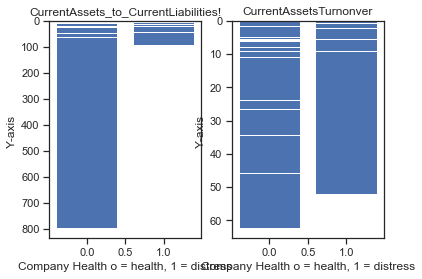

In [30]:
#Distribution in a facet

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.bar(alldf['y '], alldf['CurrentAssets_to_CurrentLiabilities'])
plt.title("CurrentAssets_to_CurrentLiabilities!")
plt.xlabel('Company Health o = health, 1 = distress')
plt.ylabel('Y-axis ')
plt.gca().invert_yaxis()#gives the chart the appropriate orrientation

plt.subplot(1, 2, 2) # index 2
plt.bar(alldf['y '], alldf['CurrentAssetsTurnonver'])
plt.title("CurrentAssetsTurnonver")
plt.xlabel('Company Health o = health, 1 = distress')
plt.ylabel('Y-axis ')
plt.gca().invert_yaxis() #gives the chart the appropriate orrientation

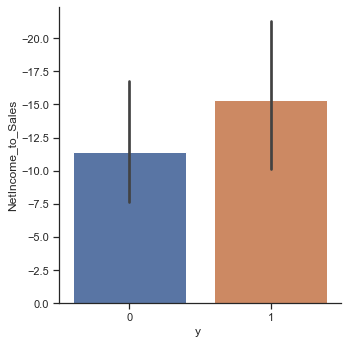

In [31]:
sns.catplot(x="y ", y="NetIncome_to_Sales", kind="bar", data=alldf)
plt.gca().invert_yaxis()

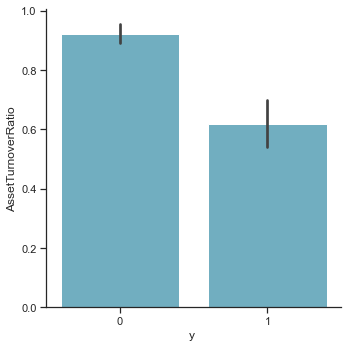

In [33]:
sns.catplot(x='y ', y="AssetTurnoverRatio", kind = "bar",
            data=alldf, color="c")

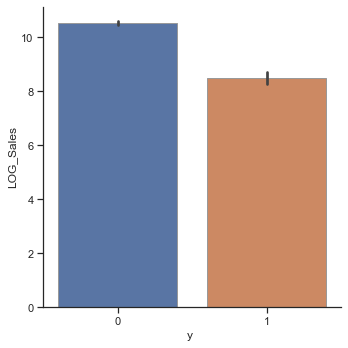

In [34]:
sns.catplot(x="y ", y="LOG_Sales", kind="bar",
            edgecolor=".6",
            data=alldf)

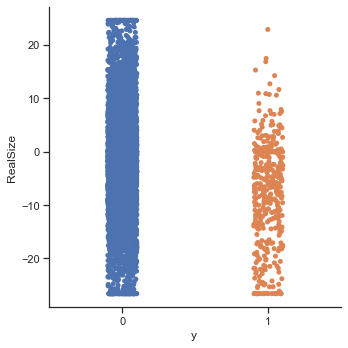

In [35]:
sns.catplot(x="y ", y="RealSize", data=alldf)

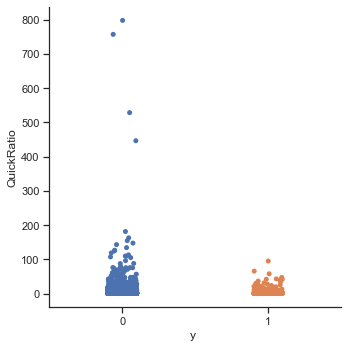

In [36]:
sns.catplot(x="y ", y="QuickRatio", data=alldf)

### Train set and Test set

In [28]:
# to know which index the 2013 starts from
#print(ade.loc[ade['year'] == 2013])

#hence, 2013 is from row index 623 to end (6605)

In [29]:
# Divide sample into two sub-samples: Training sample (2010 – 2012, index 0 to 472) and Test sample (2013-2014, index 472 to end)

trainX = adeXft[:472]
testX = adeXft[472:]

trainY = adeY[:472]
testY = adeY[472:]

#check the dimentions to ensure they correspond
print(trainX.shape, trainY.shape , testX.shape, testY.shape)

#the train data both has 472 rows while the test data both has 6133 rows


(472, 17) (472,) (6133, 17) (6133,)


### Decision Tree

In [30]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [31]:
# Create Decision Tree classifer object
clfdt = DecisionTreeClassifier()

In [32]:
# Train Decision Tree Classifer
clfdt.fit(trainX, trainY)

DecisionTreeClassifier()

In [33]:
#Predict the response for test dataset
y_pred = clfdt.predict(testX)

In [34]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy of Test Set:",metrics.accuracy_score(testY, y_pred))

Accuracy of Test Set: 0.8682537094407304


##### Testing for Overfitting and Underfitting
When the performance of a model on the training dataset is significantly better than the performance on the test dataset, then the model is can be said to have overfit the training dataset.

Also, when the performance of the model in the test dataset is significantly higher than that of the training dataset, then, underfitting error has occured.

Overfitting and Underfitting are serious issues because it is a common cause for “poor generalization” of the model as measured by high “generalization error.” That is error made by the model when making predictions on new data.

When the accuracy of the test data is not far from the train data, we can coclude that the model is not overfiting nor underfiting.

In [40]:
#Predict the response for train dataset
x_pred = clfdt.predict(trainX)

# print accuracy for the train dataset

print("Accuracy of Train Set:",metrics.accuracy_score(trainY, x_pred))

Accuracy of Train Set: 1.0


The accuracy of the train set is approximately 0.94 while accuracy for test set is 0.88.
Although these accuracies are all high, both are significantly far apart. The accuracy score for the test set is higher than the accuracy score for the train set.
Therefore, we can conclude that there is an underfitting problem in the model. This may be due to the trainset having more sample size than the test set.

# Logistic Regression

In [41]:
#Logistics_1 = glm.LogisticRegression(n_jobs=-1,max_iter=600)

clflgr = LogisticRegression(n_jobs=-1,max_iter=900)
clflgr.fit(trainX, trainY) #train the logistic regression model

ypredlgr = clflgr.decision_function(testX)

In [42]:
# model performance - accuracy score
#Checking the accuracy score for the train sets (0.94)

clflgr.score(trainX, trainY)

0.9427966101694916

In [43]:
#Checking the accuracy score for the test sets (0.93)
clflgr.score(testX, testY)

0.9331485406815588

#### Overfitting and Underfitting
The accuracy scores for the trainset (0.94) and test set (0.93) is almost same, therefore no observed issue of underfitting nor overfitting

# Random Forest Classifier

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [45]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(trainX)
X_test = sc.transform(testX)

#Y_train = sc.fit_transform(trainY)
#Y_test = sc.transform(testY)

In [46]:
# train the algorithm

from sklearn.ensemble import RandomForestRegressor

In [47]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, trainY)
y_pred = regressor.predict(X_test)

In [48]:
#Evaluating Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [49]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

In [50]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(trainX, trainY)

RandomForestClassifier(random_state=0)

In [51]:
# Predict the Test set results

y_pred = rfc.predict(testX)

In [52]:
# Check accuracy score for test sets

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(testY, y_pred)))


Model accuracy score with 10 decision-trees : 0.9364


In [53]:
# Check accuracy score for train sets

# Predict the Test set results

trainy_pred = rfc.predict(trainX)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(trainY, trainy_pred)))


Model accuracy score with 10 decision-trees : 1.0000


#### Checking for the ROC/AUC curve

Creating False and True Positive Rates and printing Scores

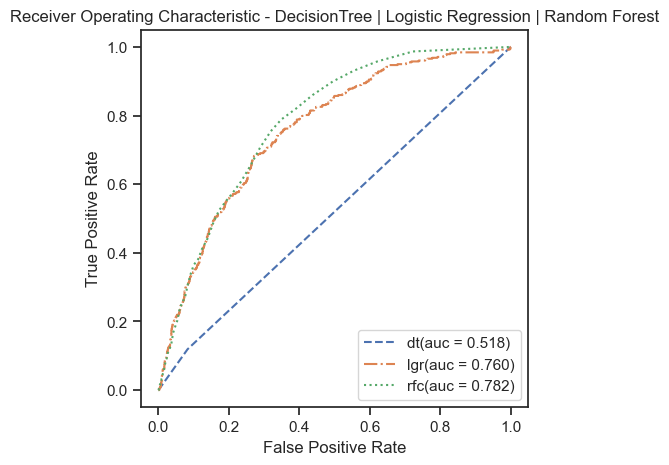

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

y_scoredt = clfdt.predict_proba(testX)[:,1]
y_scorelgr = clflgr.predict_proba(testX)[:,1]
y_scorerfc = rfc.predict_proba(testX)[:,1]

fprdt, tprdt, thresholddt = roc_curve(testY, y_scoredt)
auc_dt = auc(fprdt, tprdt)
fprlgr, tprlgr, thresholdlgr = roc_curve(testY, y_scorelgr)
auc_lgr = auc(fprlgr, tprlgr)
fprrfc, tprrfc, thresholdrfc = roc_curve(testY, y_scorerfc)
auc_rfc = auc(fprrfc, tprrfc)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fprdt, tprdt, linestyle= '--', label= 'dt(auc = %0.3f)' %auc_dt)
plt.plot(fprlgr, tprlgr, linestyle= '-.', label= 'lgr(auc = %0.3f)' %auc_lgr)
plt.plot(fprrfc, tprrfc, linestyle= ':', label= 'rfc(auc = %0.3f)' %auc_rfc)

plt.title('Receiver Operating Characteristic - DecisionTree | Logistic Regression | Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()



Best Threshold=0.080000, G-Mean=0.717


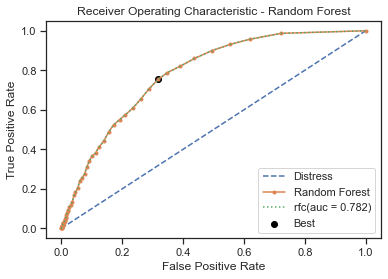

In [57]:
# plotting the RoC Curve for random forest, the best model with the highest AUC
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot

fprrfc, tprrfc, thresholdrfc = roc_curve(testY, y_scorerfc)
auc_rfc = auc(fprrfc, tprrfc)
# calculate the g-mean for each threshold
gmeans = sqrt(tprrfc * (1-fprrfc))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholdrfc[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Distress')
pyplot.plot(fprrfc, tprrfc, marker='.', label='Random Forest')
pyplot.scatter(fprrfc[ix], tprrfc[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.plot(fprrfc, tprrfc, linestyle= ':', label= 'rfc(auc = %0.3f)' %auc_rfc)
plt.title('Receiver Operating Characteristic - Random Forest')
pyplot.legend()
# show the plot
pyplot.show()

#plt.figure(figsize=(5,5), dpi=100)
#plt.plot(fprrfc, tprrfc, linestyle= ':', label= 'rfc(auc = %0.3f)' %auc_rfc)

#plt.title('Receiver Operating Characteristic - Random Forest')
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')

#plt.legend()



C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Threshold=0.046907, G-Mean=0.700


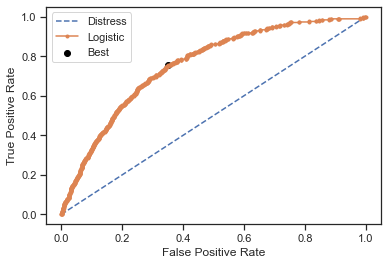

In [56]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainY)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testY, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Distress')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

### Conclusion

The random forest model among the three models showed the highest accuracy and prediction power using the sensitivity and specitifity rates.